In [37]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import glob
%matplotlib inline 

import sys
sys.path.append("../")

from measureEccentricity.measureEccentricity import get_available_methods
from measureEccentricity import measure_eccentricity
from measureEccentricity.load_data import load_waveform

In [25]:
%load_ext autoreload
%autoreload 2

In [6]:
!ls /home1/md.shaikh/etask_force/ET_sims/

Eccq1.__-0.25__-0.25__et0.1_D14_G80L_LFr_LB_NRPsi4_Strain_60modes.h5
Eccq1.__0.25__0.25__et0.2_D16_G80L_LFr_LB_NRPsi4_Strain_60modes.h5
Eccq1.__-0.5_-0.5__et0.1_D13_G80L_LFr_LB_NRPsi4_Strain_60modes.h5
Eccq1.__-0.75_-0.75__et0.1_D13_G80L_LFr_LB_NRPsi4_Strain_60modes.h5
Ecc_q2._0_0_0_0_0_0_et0.2_D16_G80L_LFr_LB_NRPsi4_Strain_60modes.h5
Eccq2.__0._0.__et0.5_D26_G80L_LFr_LB_NRPsi4_Strain_60modes.h5
Ecc_q4._0_0_0_0_0_0_et0.1_D12_G80L_LFr_LB_NRPsi4_Strain_60modes.h5


In [7]:
?load_waveform

Signature: load_waveform(catalog='LAL', file=None, nr_modelist=[[2, 2]], **kwargs)
Docstring:
Load waveform from file or LAL

parameters:
----------
catalog:
      Waveform type. could be one of 'LAL', 'EOB', 'SXS', 'ET'

file:
     Path to file for waveform to be read from a file. This is required for
     catalog other than 'LAL'

nr_modelist:
    List of modes to include when loading NR data from 'SXS' or 'ET'

**kwargs:
    Keywords to generate LAL waveform.
File:      ~/Eccentricity/measureEccentricity/load_data.py
Type:      function


In [10]:
ETFiles = glob.glob("/home1/md.shaikh/etask_force/ET_sims/*.h5")

In [11]:
ETFiles

['/home1/md.shaikh/etask_force/ET_sims/Eccq1.__0.25__0.25__et0.2_D16_G80L_LFr_LB_NRPsi4_Strain_60modes.h5',
 '/home1/md.shaikh/etask_force/ET_sims/Eccq1.__0._0.__et0.5_D27_G80L_LFr_LB_NRPsi4_Strain_60modes.h5',
 '/home1/md.shaikh/etask_force/ET_sims/Ecc_q4._0_0_0_0_0_0_et0.1_D12_G80L_LFr_LB_NRPsi4_Strain_60modes.h5',
 '/home1/md.shaikh/etask_force/ET_sims/Ecc_q4_0_0_0_0_0_0_et0.5_D27.5_G80L_LFr_LB_NRPsi4_Strain_60modes.h5',
 '/home1/md.shaikh/etask_force/ET_sims/Eccq1.__-0.75_-0.75__et0.1_D13_G80L_LFr_LB_NRPsi4_Strain_60modes.h5',
 '/home1/md.shaikh/etask_force/ET_sims/Eccq1.__-0.25__-0.25__et0.1_D14_G80L_LFr_LB_NRPsi4_Strain_60modes.h5',
 '/home1/md.shaikh/etask_force/ET_sims/Ecc_q2._0_0_0_0_0_0_et0.2_D16_G80L_LFr_LB_NRPsi4_Strain_60modes.h5',
 '/home1/md.shaikh/etask_force/ET_sims/Eccq1.__-0.5_-0.5__et0.1_D13_G80L_LFr_LB_NRPsi4_Strain_60modes.h5',
 '/home1/md.shaikh/etask_force/ET_sims/Eccq2.__0._0.__et0.5_D26_G80L_LFr_LB_NRPsi4_Strain_60modes.h5']

In [12]:
dataDict = load_waveform("ET", ETFiles[0])

In [13]:
dataDict

{'t': array([-2454.054912, -2453.892864, -2453.730816, ...,   247.609344,
          247.771392,   247.93344 ]),
 'hlm': {(2,
   2): array([ 0.13190837-0.02163632j,  0.13217572-0.02061446j,
          0.13243512-0.0195892j , ..., -0.00059329-0.00061691j,
         -0.00059242-0.00061871j, -0.00059154-0.00062047j])},
 'tHorizon': None,
 'amplm': {(2,
   2): array([0.13367105, 0.1337736 , 0.13387605, ..., 0.0008559 , 0.00085659,
         0.00085727])},
 'phaselm': {(2,
   2): array([-1.62577648e-01, -1.54716107e-01, -1.46850619e-01, ...,
          2.11291622e+02,  2.11293811e+02,  2.11295975e+02])},
 'omegalm': {(2,
   2): array([0.04850142, 0.04852586, 0.04855013, ..., 0.01357137, 0.013433  ,
         0.01326621])},
 'om_orb': None,
 'phase_orb': None}

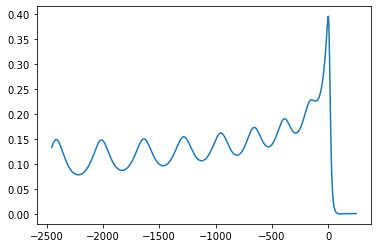

In [15]:
plt.plot(dataDict["t"], np.abs(dataDict["hlm"][(2, 2)]))

In [20]:
tref_vec = np.arange(-2000, -500)

In [21]:
?measure_eccentricity

Signature:
measure_eccentricity(
    t_ref,
    dataDict,
    method='Amplitude',
    return_ecc_method=False,
    extrema_finding_keywords=None,
    spline_keywords=None,
)
Docstring:
Measure eccentricity and mean anomaly at reference time.

parameters:
----------
t_ref:
    Reference time at which to measure eccentricity and mean anomaly.
    Can be a single float or an array.

dataDict:
    Dictionary containing waveform modes dict, time etc.
    Should follow the format:
        {"t": time, "hlm": modeDict, ...}
        with modeDict = {(l1, m1): h_{l1, m1},
                         (l2, m2): h_{l2, m2}, ...
                        }.
    Some methods may need extra data. For example, the ResidualAmplitude
    method, requires "t_zeroecc" and "hlm_zeroecc" as well in dataDict.

method:
    method to define eccentricity. See get_available_methods for available
    methods.

return_ecc_method:
    If true, returns the method object used to compute the eccentricity.

extrema_finding_k

In [22]:
ecc_vec, mean_ano_vec, eccMethod = measure_eccentricity(tref_vec, dataDict,"Amplitude", return_ecc_method=True)

/home1/md.shaikh/Eccentricity/notebook/../measureEccentricity/eccDefinition.py:137: RuntimeWarning: invalid value encountered in sqrt
  ecc_ref = ((np.sqrt(self.omega_peak_at_t_ref)
/home1/md.shaikh/Eccentricity/notebook/../measureEccentricity/eccDefinition.py:138: RuntimeWarning: invalid value encountered in sqrt
  - np.sqrt(self.omega_trough_at_t_ref))
/home1/md.shaikh/Eccentricity/notebook/../measureEccentricity/eccDefinition.py:139: RuntimeWarning: invalid value encountered in sqrt
  / (np.sqrt(self.omega_peak_at_t_ref)
/home1/md.shaikh/Eccentricity/notebook/../measureEccentricity/eccDefinition.py:140: RuntimeWarning: invalid value encountered in sqrt
  + np.sqrt(self.omega_trough_at_t_ref)))


In [23]:
eccMethod.omega22

array([-0.04851366, -0.04852583, -0.0485501 , ..., -0.01356664,
       -0.01342826, -0.01335197])

In [24]:
eccMethod.phase22

array([ 1.62577648e-01,  1.54716107e-01,  1.46850619e-01, ...,
       -2.11291622e+02, -2.11293811e+02, -2.11295975e+02])

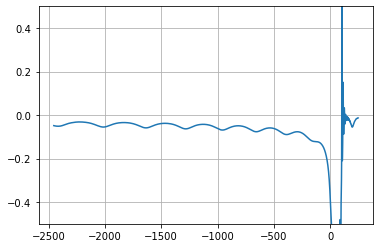

In [28]:
plt.plot(eccMethod.t, eccMethod.omega22)
plt.ylim(-0.5, 0.5)
plt.grid()

In [31]:
SXS_Files = glob.glob("/home1/md.shaikh/etask_force/AEI_sxs_sims/*.h5")

In [32]:
SXS_Files

['/home1/md.shaikh/etask_force/AEI_sxs_sims/BBH_SKS_q1.1_-0.4_-0.7_e05_D28_Res3.h5',
 '/home1/md.shaikh/etask_force/AEI_sxs_sims/BBH_SHK_q4_e095_D65_Res3.h5',
 '/home1/md.shaikh/etask_force/AEI_sxs_sims/BBH_SHK_q10_e01_D16_Res3.h5',
 '/home1/md.shaikh/etask_force/AEI_sxs_sims/BBH_SHK_q4_e035_D26_Res3.h5',
 '/home1/md.shaikh/etask_force/AEI_sxs_sims/BBH_SHK_q6_e01_D18_Res3.h5',
 '/home1/md.shaikh/etask_force/AEI_sxs_sims/BBH_SKS_q1.1_-0.4_-0.7_e025_D22_Res3.h5',
 '/home1/md.shaikh/etask_force/AEI_sxs_sims/BBH_SHK_q6_e02_D20_Res3.h5',
 '/home1/md.shaikh/etask_force/AEI_sxs_sims/BBH_SKS_q10_-0.75_0_e05_D28_Res3.h5',
 '/home1/md.shaikh/etask_force/AEI_sxs_sims/BBH_SHK_q1_e09_D70_Res3.h5',
 '/home1/md.shaikh/etask_force/AEI_sxs_sims/BBH_SHK_q8_e02_D20_Res3.h5',
 '/home1/md.shaikh/etask_force/AEI_sxs_sims/BBH_SHK_q3_e02_D17.3_Res3.h5',
 '/home1/md.shaikh/etask_force/AEI_sxs_sims/BBH_SHK_q4_e04_D28_Res3.h5',
 '/home1/md.shaikh/etask_force/AEI_sxs_sims/BBH_SHK_q6_e095_D65_Res3.h5',
 '/home1/md

In [33]:
dataDictSXS = load_waveform("SXS", SXS_Files[0])

In [35]:
ecc_vec, mean_ano_vec, eccMethod = measure_eccentricity(tref_vec, dataDictSXS,"Amplitude", return_ecc_method=True)

/home1/md.shaikh/Eccentricity/notebook/../measureEccentricity/eccDefinition.py:137: RuntimeWarning: invalid value encountered in sqrt
  ecc_ref = ((np.sqrt(self.omega_peak_at_t_ref)
/home1/md.shaikh/Eccentricity/notebook/../measureEccentricity/eccDefinition.py:138: RuntimeWarning: invalid value encountered in sqrt
  - np.sqrt(self.omega_trough_at_t_ref))
/home1/md.shaikh/Eccentricity/notebook/../measureEccentricity/eccDefinition.py:139: RuntimeWarning: invalid value encountered in sqrt
  / (np.sqrt(self.omega_peak_at_t_ref)
/home1/md.shaikh/Eccentricity/notebook/../measureEccentricity/eccDefinition.py:140: RuntimeWarning: invalid value encountered in sqrt
  + np.sqrt(self.omega_trough_at_t_ref)))


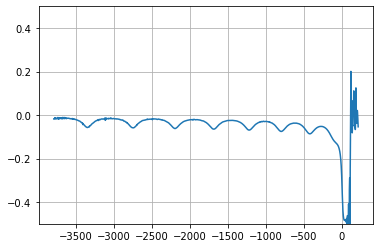

In [36]:
plt.plot(eccMethod.t, eccMethod.omega22)
plt.ylim(-0.5, 0.5)
plt.grid()